In [21]:
import statsmodels.api as sm
from datetime import datetime, date, timedelta
import yfinance as yf

import numpy as np 
import pandas as pd

companies = ['XOM', 'GIS', 'LLY', 'BABA', 'AAPL']
numbers_symbols = len(companies)
start_date = date.today() - timedelta(weeks=52*10)
end_date = date.today()
df = yf.download(companies,
    start=start_date,
    end = end_date
)['Adj Close']
df.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,BABA,GIS,LLY,XOM
Date,,,,,
2013-03-21,13.964803,NaN,34.309208,43.426670,57.654945
2013-03-22,14.247961,NaN,34.517101,43.812988,58.387341
2013-03-25,14.299479,NaN,34.466923,43.852413,58.210789
2013-03-26,14.224213,NaN,34.861202,44.380665,58.936615
2013-03-27,13.944749,NaN,34.975906,44.443741,59.230858


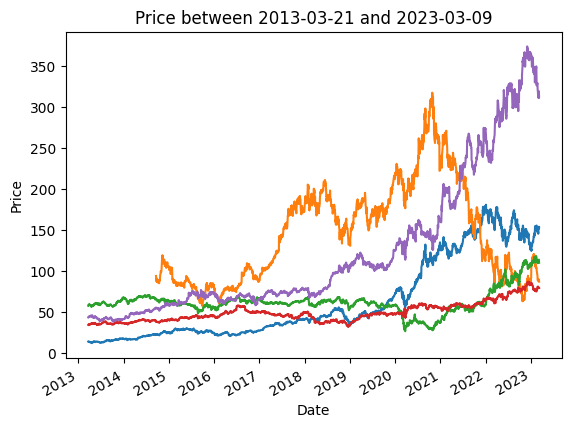

In [22]:
import matplotlib.pyplot as plt
plt.title('Price between {} and {}'.format(
    start_date.isoformat(),
    end_date.isoformat()
))
df['AAPL'].plot()
df['BABA'].plot()
df['XOM'].plot()
df['GIS'].plot()
df['LLY'].plot()

plt.ylabel('Price')
plt.xlabel('Date');

In [48]:
#return over time 
log_return = np.log(1 + df.pct_change())

#generate random weights 
random_wieghts = np.array(np.random.random(numbers_symbols))
#generate rebalance weights 
rebalance = random_wieghts / np.sum(random_wieghts)

#calculate the expected returns , annualized (252)
exp_ret = np.sum((log_return.mean() * rebalance) * 252)

# calculate expected volatility, annualized (matrix mult)
exp_vol = np.sqrt(
    np.dot(
    rebalance.T,
    np.dot(
    log_return.cov() * 252,
    rebalance
    )
    )
)

# calculate the sharpe ratio (without risk free rate)
sharpe_ratio = (exp_ret - .01) / exp_vol

#metrics in a df to be more clear 
mertics_df = pd.DataFrame(data = {
    'Expected portfolio return' : exp_ret,
    'Expected portfolio volatility' : exp_vol,
    'Portfolio Sharpe Ratio' : sharpe_ratio
}, index=[0])
display(mertics_df)

,Expected portfolio return,Expected portfolio volatility,Portfolio Sharpe Ratio
0,0.11316,0.208113,0.495693
